In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from process_strava_data import load_run_data
from helper_functions import format_timedelta

In [27]:
# load the cleaned_dataset
runs_df = load_run_data()
runs_df.tail()

,name,distance_m,moving_time_s,elapsed_time_s,elevation_change_m,type,date,average_cadence,average_heartrate,max_heartrate,pace_per_mile,distance_mi,id,year,year_month,season,time_of_day,average_zone,max_zone,ratio_avg_hr_to_max_hr
186,Afternoon Run,6474,2103,2119,24.8,Run,2024-08-11,83.7,148.4,163,0 days 00:08:43.134328358,4.02,12123758277,2024,2024-08,summer,afternoon,3,4,0.910429
187,Afternoon Run,4224,1414,1428,10.6,Run,2024-08-12,82.5,146.1,159,0 days 00:08:59.694656489,2.62,12132136364,2024,2024-08,summer,afternoon,3,4,0.918868
188,Afternoon Run,5521,1436,1831,16.4,Run,2024-08-14,88.5,162.2,186,0 days 00:06:58.658892128,3.43,12150323730,2024,2024-08,summer,afternoon,4,5,0.872043
189,Afternoon Run,6924,2211,2214,18.6,Run,2024-08-15,84.4,153.1,174,0 days 00:08:34.186046512,4.30,12157969829,2024,2024-08,summer,afternoon,4,5,0.879885
190,Morning Run,19973,6618,6739,61.6,Run,2024-08-18,85.4,153.8,174,0 days 00:08:53.279613215,12.41,12181393335,2024,2024-08,summer,morning,4,5,0.883908


Ideas for EDA
* Compare the average and max running zones between 2023 and 2024 runs
** How has the pace for each of the zones changed over time
* Compare runs for the Colfax half marathon training between 2023 and 2024 - 2023 was a faster time, but I was also jet lagged and under the weather leading up to the 2024 race
* Runs up to current date in 2024 and how this compares to 2023
* Runs by time of day
* Runs by season
* Runs by weather (can find weather data for each of the run dates and use the average temp depending on time of day)

Running metrics that may be useful
* Number of runs
* Number of miles
* number of long vs short distance runs
* Average pace
* Average pace of the different types of runs
* Number of weeks with 'X' number of runs
* Changes in average cadence if any
* Number of days between runs
* Times for 1 mile, 5ks, 10ks, 15ks, and 20+ks

### Zone Analysis

In [25]:
print('All time counts:')
print(runs_df[['average_zone']].value_counts(normalize=True).sort_index())
print(runs_df[['max_zone']].value_counts(normalize=True).sort_index())

print('\nYearly counts')
for year in pd.unique(runs_df['year']):
    filtered_runs_df = runs_df[runs_df['year'] == year]

    print(f'{year} counts:')
    print(filtered_runs_df[['average_zone']].value_counts(normalize=True).sort_index())
    print(filtered_runs_df[['max_zone']].value_counts(normalize=True).sort_index())
    print()

All time counts:
average_zone
2               0.010471
3               0.486911
4               0.502618
Name: proportion, dtype: float64
max_zone
3           0.036649
4           0.638743
5           0.324607
Name: proportion, dtype: float64

Yearly counts
2022 counts:
average_zone
2               0.5
3               0.5
Name: proportion, dtype: float64
max_zone
4           1.0
Name: proportion, dtype: float64

2023 counts:
average_zone
3               0.425926
4               0.574074
Name: proportion, dtype: float64
max_zone
3           0.018519
4           0.601852
5           0.379630
Name: proportion, dtype: float64

2024 counts:
average_zone
2               0.012346
3               0.567901
4               0.419753
Name: proportion, dtype: float64
max_zone
3           0.061728
4           0.679012
5           0.259259
Name: proportion, dtype: float64



19-Aug-2024

There are a couple interesting pieces of info that I can see when looking at the number of runs in each zone. For the all time counts, there is a pretty even split between the runs averaging a heart rate in zone 3 and zone 4, however my maximum heart rate seems to favor zone 4 rather than zone 5. During the most taxing portions of my run, I am able to maintain a lower heartrate, however I seem to run a majority of my runs at more of an elevated heart rate.

When looking at the zone counts by year, there is a trend that appears to be forming. I ran a majority of my runs in 2023 with an average heart rate in zone 4, however this flipped in 2024 to where I am running a majority of my runs at zone 3. Additionally, I can see the proportion of runs with a max heart rate in zone 5 also decrease between 2023 and 2024. This may indicate that I am improving in my cardiovascular endurance, but more analysis is needed before making this claim.

#### Does the time between runs have a noticeable impact on the next run?

In [29]:
offset_dates = pd.concat([pd.Series(np.nan), runs_df['date']]).reset_index(drop=True)

runs_df['days_from_last_run'] = runs_df['date'] - offset_dates
runs_df['days_from_last_run'] = runs_df['days_from_last_run'].dt.days
runs_df.tail(10)

,name,distance_m,moving_time_s,elapsed_time_s,elevation_change_m,type,date,average_cadence,average_heartrate,max_heartrate,...,distance_mi,id,year,year_month,season,time_of_day,average_zone,max_zone,ratio_avg_hr_to_max_hr,days_from_last_run
181,Evening Run,5455,1818,1849,13.3,Run,2024-07-22,84.4,152.0,170,...,3.39,11956504963,2024,2024-07,summer,evening,3,4,0.894118,6.0
182,Evening Run,4984,1732,1732,13.5,Run,2024-07-27,83.3,154.6,167,...,3.10,11998452204,2024,2024-07,summer,evening,4,4,0.925749,5.0
183,Morning Run,13455,4581,4591,49.1,Run,2024-07-28,85.1,158.2,178,...,8.36,12004534504,2024,2024-07,summer,morning,4,5,0.888764,1.0
184,Evening Run,7780,2469,2487,24.9,Run,2024-08-03,84.4,161.5,182,...,4.83,12056505017,2024,2024-08,summer,evening,4,5,0.887363,6.0
185,Morning Run,14495,4915,5065,111.3,Run,2024-08-04,85.8,160.1,180,...,9.01,12062625888,2024,2024-08,summer,morning,4,5,0.889444,1.0
186,Afternoon Run,6474,2103,2119,24.8,Run,2024-08-11,83.7,148.4,163,...,4.02,12123758277,2024,2024-08,summer,afternoon,3,4,0.910429,7.0
187,Afternoon Run,4224,1414,1428,10.6,Run,2024-08-12,82.5,146.1,159,...,2.62,12132136364,2024,2024-08,summer,afternoon,3,4,0.918868,1.0
188,Afternoon Run,5521,1436,1831,16.4,Run,2024-08-14,88.5,162.2,186,...,3.43,12150323730,2024,2024-08,summer,afternoon,4,5,0.872043,2.0
189,Afternoon Run,6924,2211,2214,18.6,Run,2024-08-15,84.4,153.1,174,...,4.30,12157969829,2024,2024-08,summer,afternoon,4,5,0.879885,1.0
190,Morning Run,19973,6618,6739,61.6,Run,2024-08-18,85.4,153.8,174,...,12.41,12181393335,2024,2024-08,summer,morning,4,5,0.883908,3.0


In [10]:
# number of runs in each zone between the two training programs for the colfax half

training_start_2023 = pd.to_datetime('2023-02-04')
training_end_2023 = pd.to_datetime('2023-05-21')
training_start_2024 = pd.to_datetime('2024-01-21')
training_end_2024 = pd.to_datetime('2024-05-19')

training_runs_2023 = runs_df.loc[(runs_df['date'] >= training_start_2023) & (runs_df['date'] < training_end_2023)]
training_runs_2024 = runs_df.loc[(runs_df['date'] >= training_start_2024) & (runs_df['date'] < training_end_2024)]

print(f'2023 Colfax Half Training:\n{training_runs_2023.groupby("average_zone").size()}\n')
print(f'2024 Colfax Half Training:\n{training_runs_2024.groupby("average_zone").size()}')

2023 Colfax Half Training:
average_zone
3    18
4    21
dtype: int64

2024 Colfax Half Training:
average_zone
3    28
4    20
dtype: int64


~46% of runs during the 2023 training were in zone 3 compared to ~58% of runs during the second training program.

In [11]:
def summary_stats_to_str(df):
    average_pace = format_timedelta(df['pace_per_mile'].mean())
    total_miles = round(df['distance_mi'].sum(), 2)
    total_runs = df.shape[0]
    return f'Total Runs: {total_runs}\nTotal Miles: {total_miles}\nAverage Pace: {average_pace}'

def format_timedelta(dlt):
    minutes, seconds = divmod(int(dlt.total_seconds()), 60)
    return f'{minutes:02}:{seconds:02}'

In [12]:
print('2023 Colfax Half Training:\n' + summary_stats_to_str(training_runs_2023) + '\n')
print('2024 Colfax Half Training:\n' + summary_stats_to_str(training_runs_2024))

2023 Colfax Half Training:
Total Runs: 39
Total Miles: 152.67
Average Pace: 08:34

2024 Colfax Half Training:
Total Runs: 48
Total Miles: 216.37
Average Pace: 08:39


I ran ~30% less miles in the first training program compared to the second, yet maintained a similar pace. I ran 9 more times leading up to the race which was almost a 25% increase.

In [13]:
# number of runs in the month leading up to the race

filter_date_2023 = pd.to_datetime('2023-04-21')
filter_date_2024 = pd.to_datetime('2024-04-19')

final_month_runs_2023 = training_runs_2023.loc[training_runs_2023['date'] >= filter_date_2023]
final_month_runs_2024 = training_runs_2024.loc[training_runs_2024['date'] >= filter_date_2024]

print('2023 Colfax Half Training - Final Month:\n' + summary_stats_to_str(final_month_runs_2023) + '\n')
print('2024 Colfax Half Training - Final Month:\n' + summary_stats_to_str(final_month_runs_2024))


2023 Colfax Half Training - Final Month:
Total Runs: 10
Total Miles: 49.68
Average Pace: 08:31

2024 Colfax Half Training - Final Month:
Total Runs: 12
Total Miles: 57.93
Average Pace: 08:27


In [14]:
current_training_start_date = pd.to_datetime('2024-05-29')
current_training_runs = runs_df.loc[runs_df['date'] >= current_training_start_date]

print('Current Training Plan Runs:\n' + summary_stats_to_str(current_training_runs))
print()
print(current_training_runs.groupby("average_zone").size())

Current Training Plan Runs:
Total Runs: 19
Total Miles: 73.73
Average Pace: 09:03

average_zone
2     1
3    13
4     5
dtype: int64


In [15]:
# grouping running stats by month

runs_df['year_month'] = runs_df['date'].dt.to_period('M')
runs_by_month = (runs_df.groupby('year_month')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                )
runs_by_month['formatted_pace_per_mile'] = pd.to_datetime(runs_by_month['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_month

,year_month,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,2022-12,5.27,2,0 days 00:09:48.435459567,2,00:09:48
1,2023-01,1.75,1,0 days 00:08:32,4,00:08:32
2,2023-02,32.88,13,0 days 00:08:55.163045765,4,00:08:55
3,2023-03,26.06,7,0 days 00:08:24.321166731,3,00:08:24
4,2023-04,67.35,13,0 days 00:08:18.978842749,4,00:08:18
5,2023-05,50.54,10,0 days 00:08:20.213384713,4,00:08:20
6,2023-06,25.79,9,0 days 00:08:41.311536774,4,00:08:41
7,2023-07,48.44,14,0 days 00:08:44.133660251,4,00:08:44
8,2023-08,53.81,12,0 days 00:08:06.538107280,3,00:08:06
9,2023-09,51.51,8,0 days 00:08:14.978643599,4,00:08:14


/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/2433429868.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)


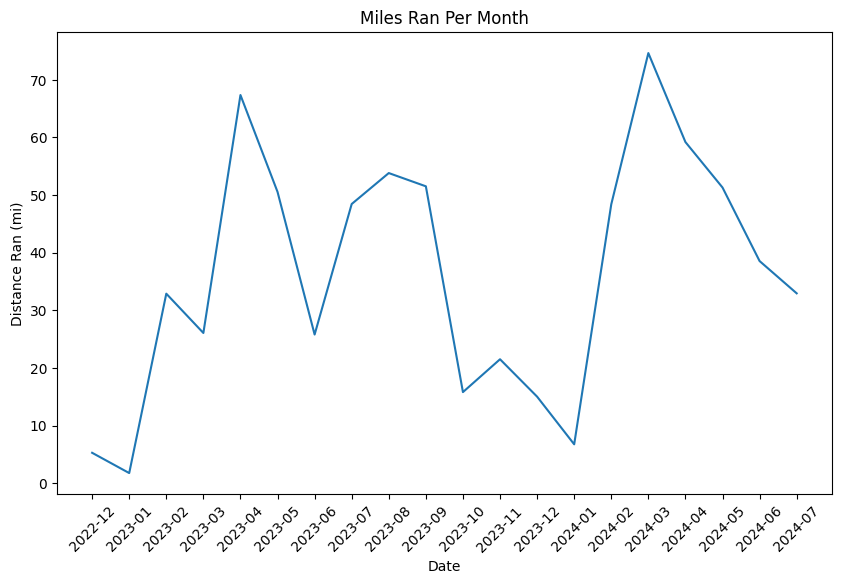

In [16]:
# visualizing miles and total runs

plt.figure(figsize=(10,6))
ax = sns.lineplot(x=runs_by_month['year_month'].astype(str), y=runs_by_month['distance_mi'])
ax.set_title('Miles Ran Per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Distance Ran (mi)')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

plt.show()

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/2902557314.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)


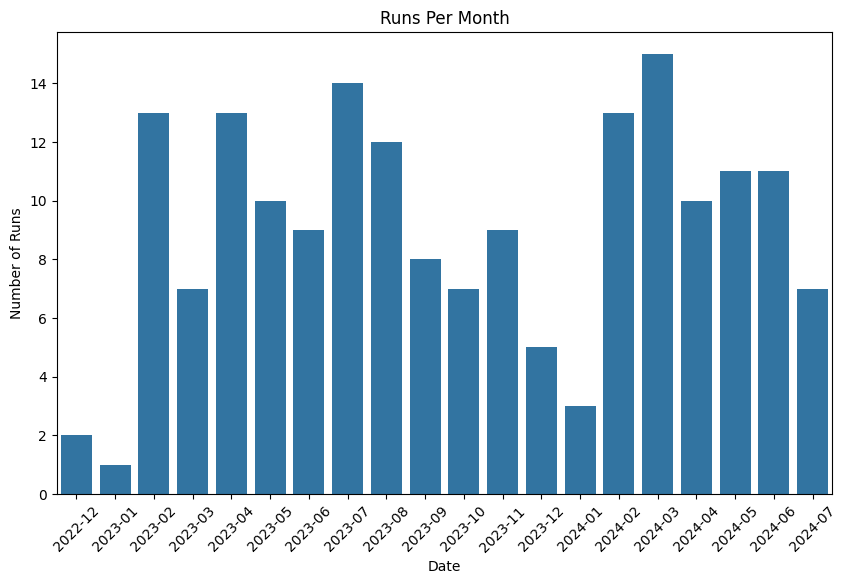

In [17]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=runs_by_month['year_month'].astype(str), y=runs_by_month['number_of_runs'])
ax.set_title('Runs Per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Runs')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

plt.show()

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/1169179082.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


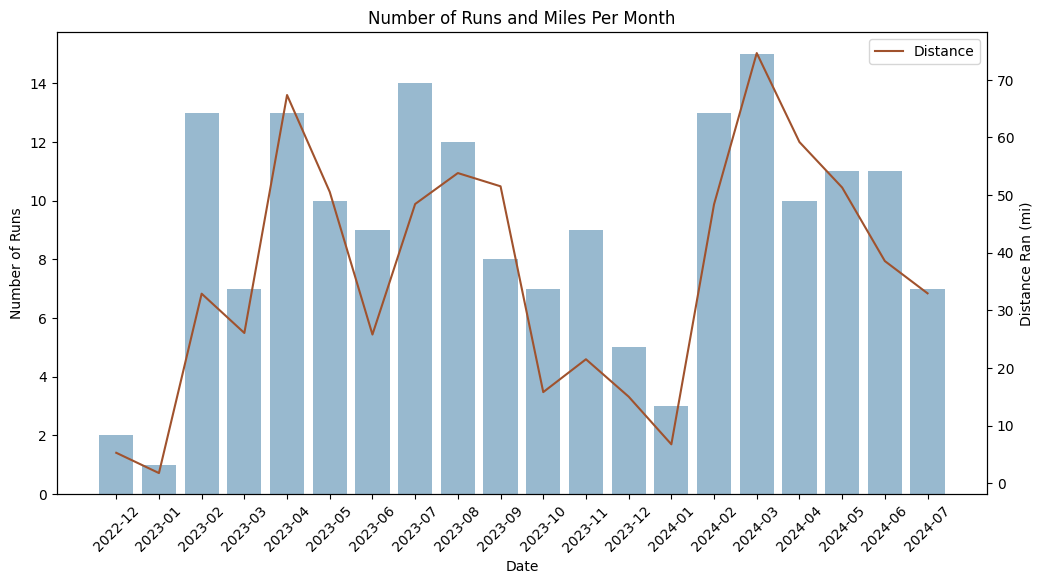

In [18]:
def plot_run_features_by_month(y1, y2, line_label, title, y1_label, y2_label):
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    sns.barplot(x=runs_by_month['year_month'].astype(str), y=y1, alpha=.5, ax=ax1)
    ax2 = ax1.twinx()
    sns.lineplot(x=runs_by_month['year_month'].astype(str), y=y2, color='sienna', label=line_label, ax=ax2)
    
    ax1.set_title(title)
    ax1.set_xlabel('Date')
    ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    
    plt.show()

plot_run_features_by_month(runs_by_month['number_of_runs'], runs_by_month['distance_mi'], 'Distance', 'Number of Runs and Miles Per Month', 'Number of Runs', 'Distance Ran (mi)')

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/1169179082.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


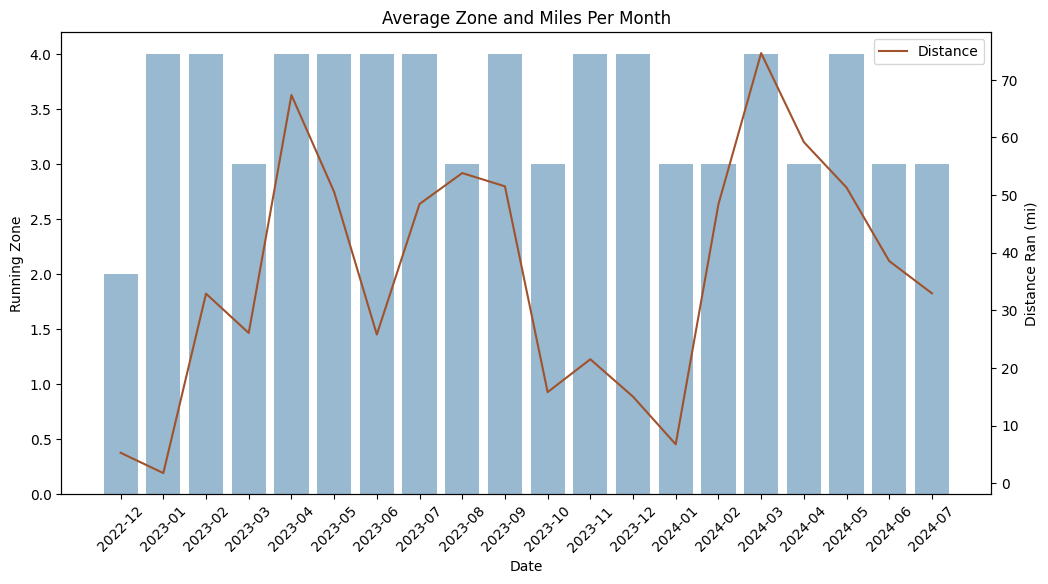

In [19]:
plot_run_features_by_month(runs_by_month['average_zone'], runs_by_month['distance_mi'], 'Distance', 'Average Zone and Miles Per Month', 'Running Zone', 'Distance Ran (mi)')

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/1169179082.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


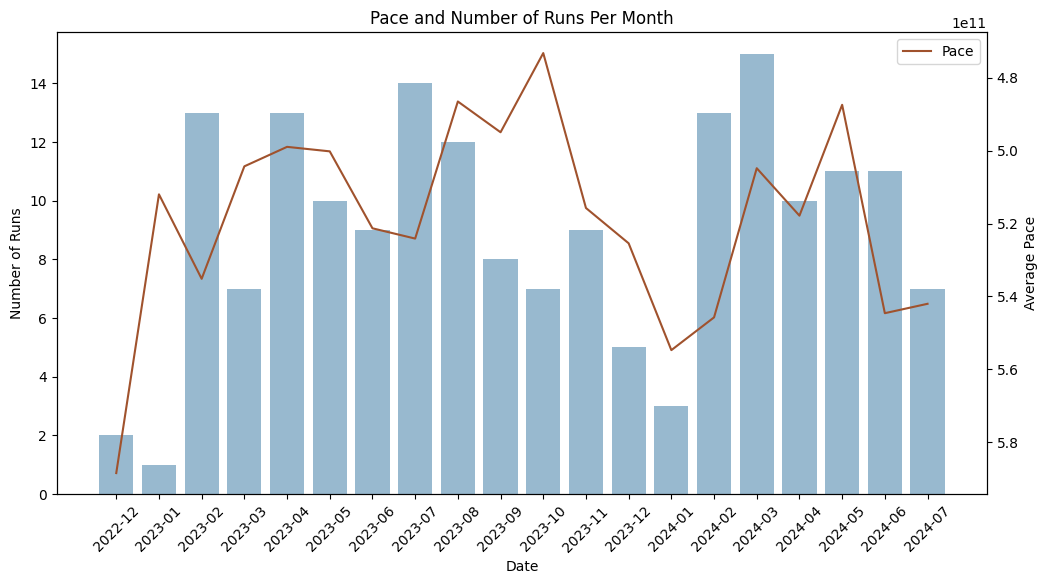

In [20]:
plot_run_features_by_month(runs_by_month['number_of_runs'], runs_by_month['pace_per_mile'], 'Pace', 'Pace and Number of Runs Per Month', 'Number of Runs', 'Average Pace')

There seems to be a bit of a lag on the increase or dropoff in pace as the number of runs increases or decreases over the months.

In [21]:
# look at pace and distance for months with more and less runs than average

average_runs_per_month = runs_df.shape[0] / len(pd.unique(runs_df['year_month']))
months_above_average_runs = runs_by_month.loc[runs_by_month['number_of_runs'] > average_runs_per_month]
months_below_average_runs = runs_by_month.loc[runs_by_month['number_of_runs'] < average_runs_per_month]

months_above_average_runs.describe()

,distance_mi,number_of_runs,pace_per_mile,average_zone
count,10.000000,10.000000,10,10.000000
mean,52.507000,12.200000,0 days 00:08:34.549565998,3.600000
std,12.361294,1.686548,0 days 00:00:22.271313262,0.516398
min,32.880000,10.000000,0 days 00:08:06.538107280,3.000000
25%,48.402500,11.000000,0 days 00:08:19.287478240,3.000000
50%,50.920000,12.500000,0 days 00:08:31.342969029,4.000000
75%,57.845000,13.000000,0 days 00:08:52.405699386,4.000000
max,74.630000,15.000000,0 days 00:09:05.739247131,4.000000


In [22]:
months_below_average_runs.describe()

,distance_mi,number_of_runs,pace_per_mile,average_zone
count,8.000000,8.000000,8,8.000000
mean,19.385000,5.000000,0 days 00:08:44.396294374,3.250000
std,16.743547,2.672612,0 days 00:00:36.584551855,0.707107
min,1.750000,1.000000,0 days 00:07:53.263546297,2.000000
25%,6.372500,2.750000,0 days 00:08:21.985535948,3.000000
50%,15.405000,6.000000,0 days 00:08:38.715313879,3.000000
75%,27.780000,7.000000,0 days 00:09:05.193079548,4.000000
max,51.510000,8.000000,0 days 00:09:48.435459567,4.000000


For months where I run less than average, I see a very large dropoff in the my average miles ran. My the average number of runs is halfed compared to months I run more than average, however the number of miles drops off by a factor of almost 3. Average pace and average running zone is relatively consistent between the two groups.

In [23]:
print('Above average running months:')
print(f'\tAverage number of runs: {months_above_average_runs["number_of_runs"].mean():.1f}')
print(f'\tAverage miles per month: {months_above_average_runs["distance_mi"].mean():.2f}')
print(f'\tMost frequent running zone: {months_above_average_runs["average_zone"].mode()[0]}\n')

print('Below average running months:')
print(f'\tAverage number of runs: {months_below_average_runs["number_of_runs"].mean():.1f}')
print(f'\tAverage miles per month: {months_below_average_runs["distance_mi"].mean():.2f}')
print(f'\tMost frequent running zone: {months_below_average_runs["average_zone"].mode()[0]}\n')

Above average running months:
	Average number of runs: 12.2
	Average miles per month: 52.51
	Most frequent running zone: 4

Below average running months:
	Average number of runs: 5.0
	Average miles per month: 19.38
	Most frequent running zone: 3



In [24]:
runs_by_time_of_day = (runs_df.groupby('time_of_day')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                      )
runs_by_time_of_day['formatted_pace_per_mile'] = pd.to_datetime(runs_by_time_of_day['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_time_of_day

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/3536975338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runs_by_time_of_day = (runs_df.groupby('time_of_day')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]


,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,afternoon,163.29,37,0 days 00:08:27.713403057,3,00:08:27
1,evening,306.30,90,0 days 00:08:42.894963310,3,00:08:42
2,morning,240.57,45,0 days 00:08:21.340999350,4,00:08:21
3,night,17.28,8,0 days 00:09:00.613346363,3,00:09:00


In [25]:
runs_by_time_of_day['miles_per_run'] = runs_by_time_of_day['distance_mi'] / runs_by_time_of_day['number_of_runs']
runs_by_time_of_day

,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile,miles_per_run
0,afternoon,163.29,37,0 days 00:08:27.713403057,3,00:08:27,4.413243
1,evening,306.30,90,0 days 00:08:42.894963310,3,00:08:42,3.403333
2,morning,240.57,45,0 days 00:08:21.340999350,4,00:08:21,5.346000
3,night,17.28,8,0 days 00:09:00.613346363,3,00:09:00,2.160000


Night runs seem to be the worst for me, however I do not regularly run at those times. A large majority of the runs comes during the evening, however I appear to do better running in the morning and afternoon runs. I average more miles per run and do them at a faster pace. This would make sense as my morning and afternoon runs generally occur on the weekends and the evening runs are more likely on weekdays where I do a run after a day of work.

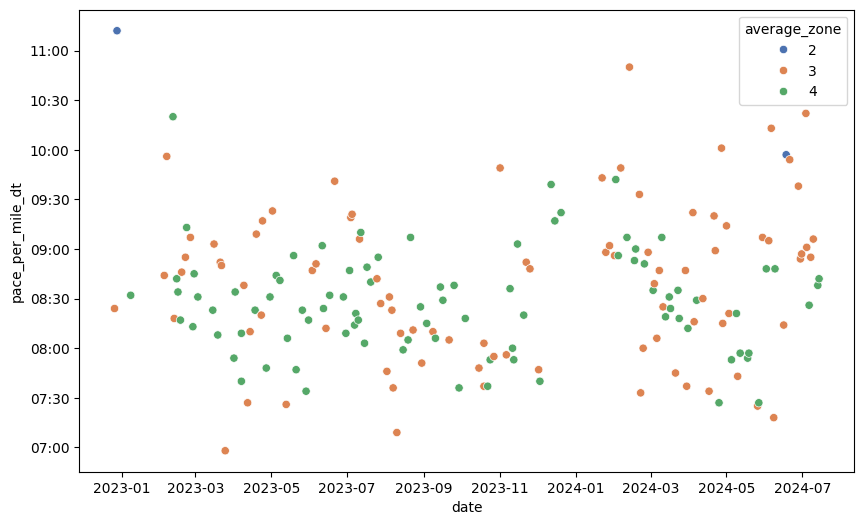

In [26]:
# plotting pace over time for the different average_zones
import matplotlib.dates as mdates
runs_df['pace_per_mile_dt'] = pd.to_datetime(runs_df['pace_per_mile'].apply(format_timedelta), format='%M:%S')
runs_df['formatted_pace_per_mile'] = runs_df['pace_per_mile_dt'].dt.time

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=runs_df['date'], y=runs_df['pace_per_mile_dt'], hue=runs_df['average_zone'], palette='deep')
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

plt.show()

The number of zone 3 runs appears to be starting to trend up and the number of zone 4 runs appears to be trending down without a noticable trend in pace.

In [27]:
# looking a runs by season
def date_to_season(date):
    seasons = {'winter': [12, 1, 2],
               'spring': [3, 4, 5],
               'summer': [6, 7, 8],
               'fall': [9, 10, 11]}
    for season, months in seasons.items():
        if date.month in months:
            return season
            
runs_df['season'] = runs_df['date'].apply(date_to_season)
runs_by_season = (runs_df.groupby('season')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                )
runs_by_season['formatted_pace_per_mile'] = pd.to_datetime(runs_by_season['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_season

,season,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,fall,88.81,24,0 days 00:08:16.432847667,4,00:08:16
1,spring,329.07,66,0 days 00:08:22.002040468,4,00:08:22
2,summer,199.52,53,0 days 00:08:41.749846223,3,00:08:41
3,winter,110.04,37,0 days 00:09:01.403499675,3,00:09:01


In [28]:
runs_by_season_and_time = (runs_df.groupby(['season', 'time_of_day'])[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                )
runs_by_season_and_time.drop(index=3, axis=0, inplace=True)
runs_by_season_and_time['formatted_pace_per_mile'] = pd.to_datetime(runs_by_season_and_time['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_season_and_time

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_9770/782326065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runs_by_season_and_time = (runs_df.groupby(['season', 'time_of_day'])[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]


,season,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,fall,afternoon,13.15,5,0 days 00:08:06.306588052,3.0,00:08:06
1,fall,evening,40.38,14,0 days 00:08:23.593031654,4.0,00:08:23
2,fall,morning,35.28,5,0 days 00:08:06.510592118,4.0,00:08:06
4,spring,afternoon,98.99,17,0 days 00:08:17.609974540,4.0,00:08:17
5,spring,evening,116.75,31,0 days 00:08:30.292850550,3.0,00:08:30
6,spring,morning,111.65,17,0 days 00:08:07.646838850,4.0,00:08:07
7,spring,night,1.68,1,0 days 00:09:23.690476190,3.0,00:09:23
8,summer,afternoon,21.80,6,0 days 00:08:17.057730885,3.0,00:08:17
9,summer,evening,103.86,28,0 days 00:08:53.924405032,3.0,00:08:53
10,summer,morning,59.95,13,0 days 00:08:28.430129761,4.0,00:08:28


In [29]:
runs_by_season_and_time.sort_values(by='pace_per_mile')

,season,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,fall,afternoon,13.15,5,0 days 00:08:06.306588052,3.0,00:08:06
2,fall,morning,35.28,5,0 days 00:08:06.510592118,4.0,00:08:06
6,spring,morning,111.65,17,0 days 00:08:07.646838850,4.0,00:08:07
8,summer,afternoon,21.80,6,0 days 00:08:17.057730885,3.0,00:08:17
4,spring,afternoon,98.99,17,0 days 00:08:17.609974540,4.0,00:08:17
1,fall,evening,40.38,14,0 days 00:08:23.593031654,4.0,00:08:23
10,summer,morning,59.95,13,0 days 00:08:28.430129761,4.0,00:08:28
5,spring,evening,116.75,31,0 days 00:08:30.292850550,3.0,00:08:30
11,summer,night,13.91,6,0 days 00:08:38.486739455,3.0,00:08:38
14,winter,morning,33.69,10,0 days 00:08:42.820406284,4.0,00:08:42


In [30]:
runs_df

,name,distance_m,moving_time_s,elapsed_time_s,elevation_change_m,type,date,average_cadence,average_heartrate,max_heartrate,pace_per_mile,distance_mi,id,time_of_day,average_zone,max_zone,ratio_avg_hr_to_max_hr,year,year_month,pace_per_mile_dt,formatted_pace_per_mile,season
0,Evening Run,5823,0 days 00:30:25,1828,10.9,Run,2022-12-26 00:00:00,86.7,152.4,167,0 days 00:08:24.143646408,3.62,NaN,evening,3,4,0.912575,2022,2022-12,1900-01-01 00:08:24,00:08:24,winter
1,Morning Run,2650,0 days 00:18:30,1633,-6.6,Run,2022-12-28 00:00:00,73.7,133.0,157,0 days 00:11:12.727272727,1.65,NaN,morning,2,4,0.847134,2022,2022-12,1900-01-01 00:11:12,00:11:12,winter
2,Evening Run,2813,0 days 00:14:56,896,23.2,Run,2023-01-08 00:00:00,86.5,160.9,173,0 days 00:08:32,1.75,NaN,evening,4,5,0.930058,2023,2023-01,1900-01-01 00:08:32,00:08:32,winter
3,Afternoon Run,3382,0 days 00:18:22,1179,18.9,Run,2023-02-04 00:00:00,85.9,141.4,176,0 days 00:08:44.761904761,2.10,NaN,afternoon,3,5,0.803409,2023,2023-02,1900-01-01 00:08:44,00:08:44,winter
4,Afternoon Run,3652,0 days 00:22:35,1357,31.8,Run,2023-02-06 00:00:00,82.7,146.8,166,0 days 00:09:56.916299559,2.27,NaN,afternoon,3,4,0.884337,2023,2023-02,1900-01-01 00:09:56,00:09:56,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Morning Run,6643,0 days 00:34:51,2098,17.7,Run,2024-07-06 10:32:56,85.9,154.9,172,0 days 00:08:26.295399515,4.13,1.182417e+10,morning,4,5,0.900581,2024,2024-07,1900-01-01 00:08:26,00:08:26,summer
176,Afternoon Run,9989,0 days 00:55:27,3327,33.8,Run,2024-07-07 17:38:54,85.7,148.3,166,0 days 00:08:55.748792270,6.21,1.183414e+10,afternoon,3,4,0.893373,2024,2024-07,1900-01-01 00:08:55,00:08:55,summer
177,Evening Run,6974,0 days 00:39:28,2399,21.3,Run,2024-07-09 19:11:55,83.7,146.6,160,0 days 00:09:06.882217090,4.33,1.185075e+10,evening,3,4,0.916250,2024,2024-07,1900-01-01 00:09:06,00:09:06,summer
178,Morning Run,7678,0 days 00:41:12,2472,24.9,Run,2024-07-13 10:05:18,85.6,161.7,186,0 days 00:08:38.238993710,4.77,1.187961e+10,morning,4,5,0.869355,2024,2024-07,1900-01-01 00:08:38,00:08:38,summer


In [31]:
# runs_df.to_csv('run_data.csv')

In [32]:
runs_2023 = runs_df.loc[(runs_df['year_month'] >= '2023-01') & (runs_df['year_month'] <= '2023-12')]
runs_2024 = runs_df.loc[(runs_df['year_month'] >= '2024-01') & (runs_df['year_month'] <= '2024-12')]    

print('Runs 2023:\n')
print(runs_2023['average_zone'].value_counts(normalize=True))
print(summary_stats_to_str(runs_2023) + '\n')

print('Runs 2024:\n')
print(runs_2024['average_zone'].value_counts(normalize=True))
print(summary_stats_to_str(runs_2024))

Runs 2023:

average_zone
4    0.574074
3    0.425926
Name: proportion, dtype: float64
Total Runs: 108
Total Miles: 410.44
Average Pace: 08:28

Runs 2024:

average_zone
3    0.600000
4    0.385714
2    0.014286
Name: proportion, dtype: float64
Total Runs: 70
Total Miles: 311.73
Average Pace: 08:43


So far for 2024, I am running a little over 60% of my runs at zone 3 compared to only ~43% of my runs in 2023.

In [33]:
# compare runs up to current date between 2023 and 2024

cutoff_date = runs_2024.sort_values(by='date').tail(1)['date'].iloc[0] + pd.offsets.DateOffset(years=-1)
runs_2023_cutoff = runs_2023.loc[runs_2023['date'] <= cutoff_date]
runs_2023_cutoff

,name,distance_m,moving_time_s,elapsed_time_s,elevation_change_m,type,date,average_cadence,average_heartrate,max_heartrate,pace_per_mile,distance_mi,id,time_of_day,average_zone,max_zone,ratio_avg_hr_to_max_hr,year,year_month,pace_per_mile_dt,formatted_pace_per_mile,season
2,Evening Run,2813,0 days 00:14:56,896,23.2,Run,2023-01-08,86.5,160.9,173,0 days 00:08:32,1.75,NaN,evening,4,5,0.930058,2023,2023-01,1900-01-01 00:08:32,00:08:32,winter
3,Afternoon Run,3382,0 days 00:18:22,1179,18.9,Run,2023-02-04,85.9,141.4,176,0 days 00:08:44.761904761,2.10,NaN,afternoon,3,5,0.803409,2023,2023-02,1900-01-01 00:08:44,00:08:44,winter
4,Afternoon Run,3652,0 days 00:22:35,1357,31.8,Run,2023-02-06,82.7,146.8,166,0 days 00:09:56.916299559,2.27,NaN,afternoon,3,4,0.884337,2023,2023-02,1900-01-01 00:09:56,00:09:56,winter
5,Afternoon Run,3454,0 days 00:22:14,1401,23.2,Run,2023-02-11,81.6,156.3,181,0 days 00:10:20.465116279,2.15,NaN,afternoon,4,5,0.863536,2023,2023-02,1900-01-01 00:10:20,00:10:20,winter
6,Afternoon Run,4756,0 days 00:24:36,1479,14.1,Run,2023-02-12,86.7,152.1,161,0 days 00:08:18.648648648,2.96,NaN,afternoon,3,4,0.944720,2023,2023-02,1900-01-01 00:08:18,00:08:18,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Evening Run,6056,0 days 00:31:01,1923,8.5,Run,2023-07-07,87.0,157.9,175,0 days 00:08:14.946808510,3.76,NaN,evening,4,5,0.902286,2023,2023-07,1900-01-01 00:08:14,00:08:14,summer
59,Morning Run,5775,0 days 00:30:00,1823,15.3,Run,2023-07-08,88.7,156.5,173,0 days 00:08:21.392757660,3.59,NaN,morning,4,5,0.904624,2023,2023-07,1900-01-01 00:08:21,00:08:21,summer
60,Evening Run,8065,0 days 00:41:32,2518,16.3,Run,2023-07-10,88.2,157.8,172,0 days 00:08:17.405189620,5.01,NaN,evening,4,5,0.917442,2023,2023-07,1900-01-01 00:08:17,00:08:17,summer
61,Night Run,2913,0 days 00:16:29,989,13.3,Run,2023-07-11,86.2,144.1,168,0 days 00:09:06.408839779,1.81,NaN,night,3,4,0.857738,2023,2023-07,1900-01-01 00:09:06,00:09:06,summer


In [34]:
print('Runs 2023 to Current Date:\n')
print(runs_2023_cutoff['average_zone'].value_counts(normalize=True))
print(summary_stats_to_str(runs_2023_cutoff) + '\n')

print('Runs 2024 to Current Date:\n')
print(runs_2024['average_zone'].value_counts(normalize=True))
print(summary_stats_to_str(runs_2024))

Runs 2023 to Current Date:

average_zone
4    0.590164
3    0.409836
Name: proportion, dtype: float64
Total Runs: 61
Total Miles: 229.21
Average Pace: 08:35

Runs 2024 to Current Date:

average_zone
3    0.600000
4    0.385714
2    0.014286
Name: proportion, dtype: float64
Total Runs: 70
Total Miles: 311.73
Average Pace: 08:43


Up to this point in the year (13-Jul-2024), I am on pace for more miles, and more runs compared to last year. The difference between the proportion of runs between zone 3 and zone 4 is ever larger when only looking at the first half of the year. My pace is remaining relatively constant as well. 

These results may speak to a couple ideas:
* My running is remaining consistent, year over year, but I am seeing improvements in my heart rate zones. This may signal that I am continuing to improve in my running. I am maintining a similar pace between what I saw in 2023 versus 2024.
* I am making a focused committment to run more runs at lower heart rate zones. I may not be seeing as much decrease in my pace because I am now able to run for more miles at these lower heartrate zones.
* Running at lower heartrate zones is helping me to be able to do more runs. Injuries have slowed my training at times, so it is promising to see that I have done 8 more runs up to this point in 2024 compared to this point in 2023. 8 runs doesn't seem like a lot, but those runs may make up a majority of the ~70 mile difference between the running years.